# Imports

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
from sklearn.preprocessing import LabelEncoder
from scipy.spatial.distance import euclidean
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 2})
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

# Loading the data/Preprocessing

In [19]:
df = pd.read_csv('Fifa 23 Players Data.csv')

In [5]:
df

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,...,50,44,50,41,38,41,40,36,40,15
18535,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,https://cdn.sofifa.net/players/261/933/23_60.png,17,...,45,45,45,47,48,47,49,49,49,15
18536,L. Mullan,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,https://cdn.sofifa.net/players/267/823/23_60.png,18,...,52,49,52,46,44,46,46,42,46,17
18537,D. McCallion,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,https://cdn.sofifa.net/players/267/824/23_60.png,17,...,33,33,33,44,42,44,47,49,47,15


In [20]:
df.set_index('Full Name', inplace=True)
df = df.select_dtypes(['number'])

Separating **Mehdi Taremi** for part C.

In [21]:
mt = df.loc['Mehdi Taremi', :].to_frame().T
mt

,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
Mehdi Taremi,81,81,25500000,29,186,83,1959,422,22000,51000000,...,81,76,81,62,60,62,59,53,59,20


In [22]:
df = df.loc[df['Overall'] >= 85]

In [120]:
df

,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
Full Name,,,,,,,,,,,,,,,,,,,,,
Lionel Messi,91,91,54000000,35,169,67,2190,452,195000,99900000,...,91,88,91,67,66,67,62,53,62,22
Karim Benzema,91,91,64000000,34,185,81,2147,455,450000,131199999,...,89,84,89,67,67,67,63,58,63,21
Robert Lewandowski,91,91,84000000,33,185,81,2205,458,420000,172200000,...,86,83,86,67,69,67,64,63,64,22
Kevin De Bruyne,91,91,107500000,31,181,70,2303,483,350000,198900000,...,91,91,91,82,82,82,78,72,78,24
Kylian Mbappé,91,95,190500000,23,182,73,2177,470,230000,366700000,...,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Theo Hernández,85,90,76000000,24,184,81,2195,483,82000,134900000,...,84,81,84,86,82,86,85,82,85,20
Diogo José Teixeira da Silva,85,89,76000000,25,178,73,2183,462,170000,146300000,...,84,80,84,72,71,72,70,68,70,21
Péter Gulácsi,85,85,26500000,32,191,86,1305,456,65000,45100000,...,34,36,34,34,36,34,34,36,34,85


No missing values.

In [23]:
df.isnull().sum()

Overall           0
Potential         0
Value(in Euro)    0
Age               0
Height(in cm)     0
                 ..
RWB Rating        0
LB Rating         0
CB Rating         0
RB Rating         0
GK Rating         0
Length: 71, dtype: int64

# Part (**a**)

In [24]:
std_scaler = StandardScaler()

df = pd.DataFrame(data=std_scaler.fit_transform(df), columns=df.columns, index=df.index)

In [25]:
mt = pd.DataFrame(data=std_scaler.transform(mt), columns=mt.columns, index=mt.index)

In [26]:
df

,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
Full Name,,,,,,,,,,,,,,,,,,,,,
Lionel Messi,2.257085,1.252100,-0.489803,1.572667,-1.838418,-1.289619,0.612086,-0.189775,0.401156,-0.472748,...,0.898800,0.798942,0.898800,-0.115226,-0.237193,-0.115226,-0.306332,-0.647923,-0.306332,-0.443822
Karim Benzema,2.257085,1.252100,-0.169486,1.307644,0.294440,0.359954,0.469716,-0.042592,3.680065,0.018166,...,0.785830,0.548886,0.785830,-0.115226,-0.177567,-0.115226,-0.249557,-0.375712,-0.249557,-0.483380
Robert Lewandowski,2.257085,1.252100,0.471147,1.042620,0.294440,0.359954,0.661750,0.104592,3.294311,0.661217,...,0.616373,0.486372,0.616373,-0.115226,-0.058315,-0.115226,-0.192783,-0.103500,-0.192783,-0.443822
Kevin De Bruyne,2.257085,1.252100,1.223891,0.512573,-0.238775,-0.936139,0.986222,1.331121,2.394218,1.079984,...,0.898800,0.986484,0.898800,0.748966,0.716821,0.748966,0.602057,0.386481,0.602057,-0.364708
Kylian Mbappé,2.257085,2.897458,3.882520,-1.607615,-0.105471,-0.582659,0.569044,0.693326,0.851202,3.711788,...,0.955286,0.548886,0.955286,0.057613,-0.237193,0.057613,-0.079234,-0.430154,-0.079234,-0.483380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Theo Hernández,-1.046852,0.840760,0.214894,-1.342592,0.161136,0.359954,0.628641,1.331121,-1.051851,0.076197,...,0.503403,0.361344,0.503403,0.979417,0.716821,0.979417,0.999477,0.930904,0.999477,-0.522937
Diogo José Teixeira da Silva,-1.046852,0.429420,0.214894,-1.077568,-0.638685,-0.582659,0.588910,0.300837,0.079694,0.254997,...,0.503403,0.298830,0.503403,0.172838,0.060936,0.172838,0.147863,0.168711,0.147863,-0.483380
Péter Gulácsi,-1.046852,-1.215938,-1.370674,0.777597,1.094262,0.949087,-2.318091,0.006470,-1.270445,-1.332241,...,-2.320866,-2.451783,-2.320866,-2.016446,-2.025970,-2.016446,-1.896012,-1.573443,-1.896012,2.048278


In [27]:
pca = PCA(n_components=2)
reduced_df = pca.fit_transform(df)

df = pd.DataFrame(data=reduced_df, columns=['Feature 1','Feature 2'], index=df.index)
mt = pd.DataFrame(data=pca.transform(mt), columns=['Feature 1','Feature 2'], index=mt.index)

In [175]:
df

,Feature 1,Feature 2
Full Name,,
Lionel Messi,-4.302721,-5.838089
Karim Benzema,-3.404468,-3.642608
Robert Lewandowski,-3.445533,-2.892311
Kevin De Bruyne,-5.267533,-2.113332
Kylian Mbappé,-4.307196,-4.929756
...,...,...
Theo Hernández,-3.209178,1.997641
Diogo José Teixeira da Silva,-3.262290,-1.201405
Péter Gulácsi,14.866408,0.489203


# Part (**b**)

In [28]:
clsr = KMeans(n_clusters=5, n_init='auto')
labels = clsr.fit_predict(df)

In [29]:
u_labels = np.unique(labels)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


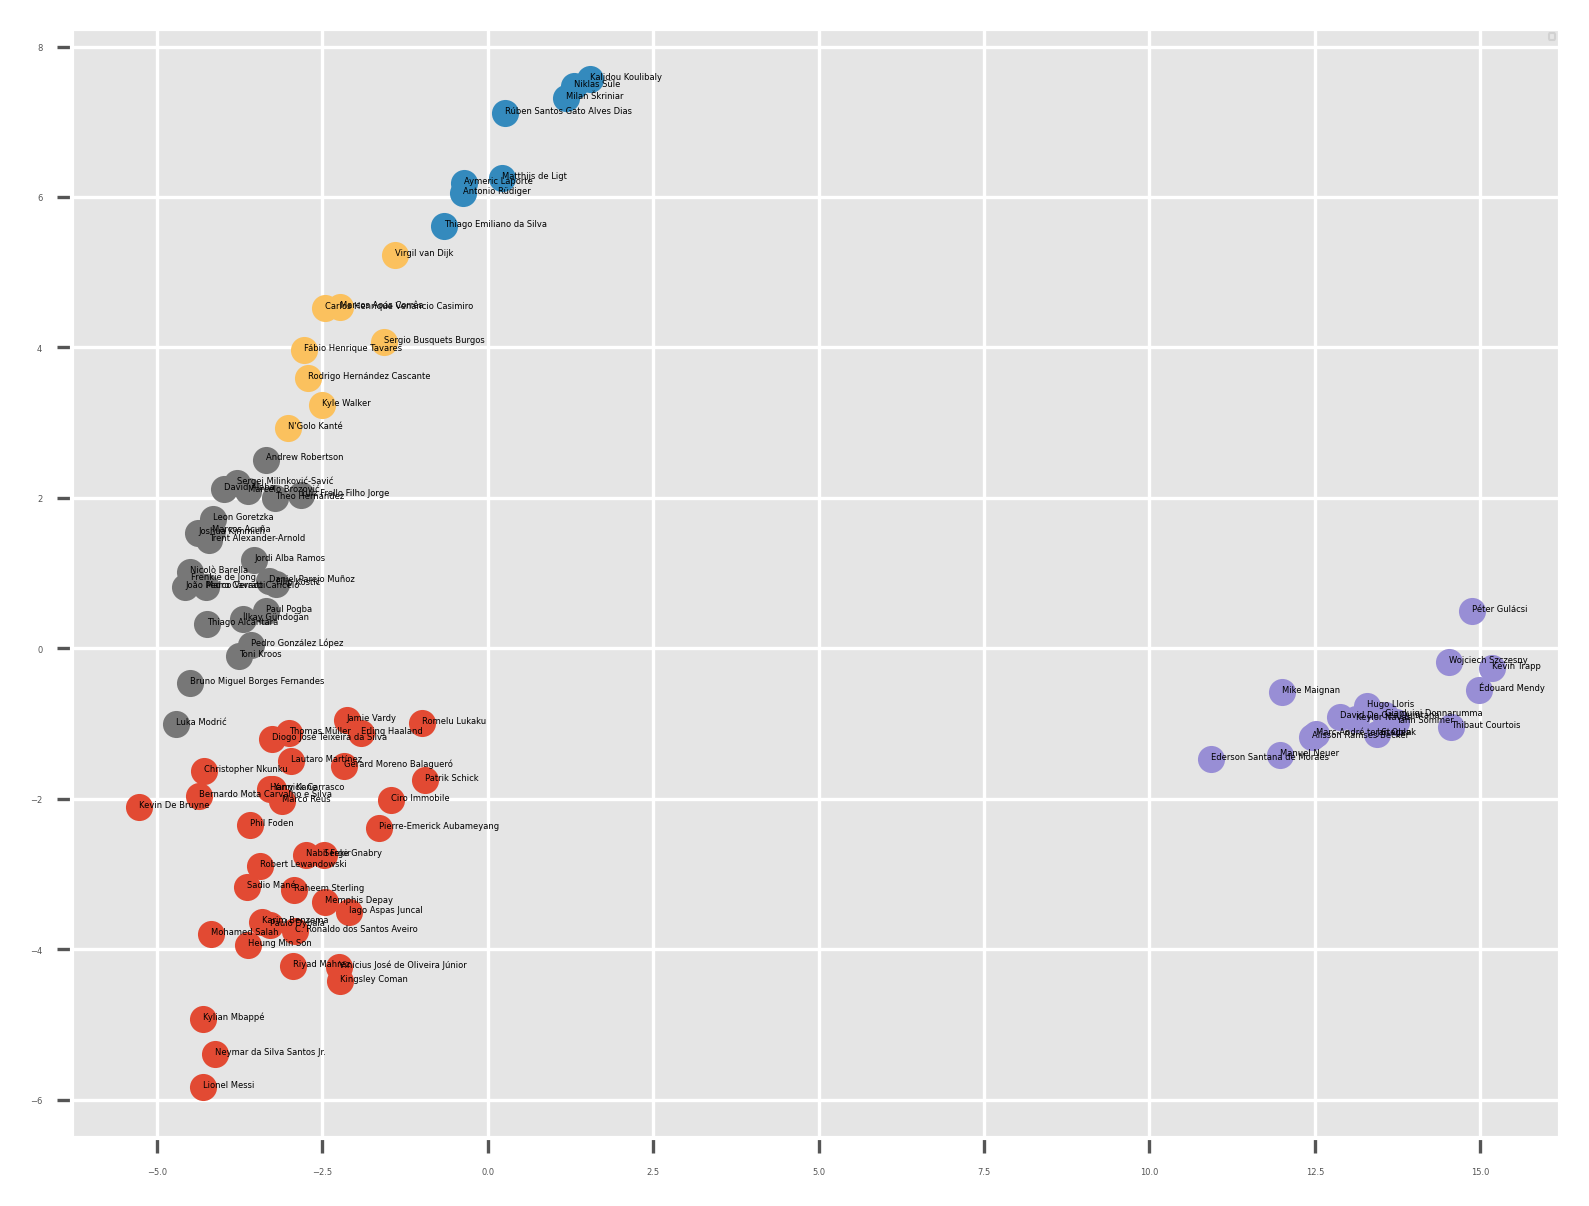

In [30]:
u_labels = np.unique(labels)
centroids = clsr.cluster_centers_

for i in u_labels:
    cluster = df[labels == i]
    plt.scatter(cluster['Feature 1'], cluster['Feature 2'])
    for idx, row in cluster.iterrows():
        plt.annotate(idx, (row['Feature 1'], row['Feature 2']))
plt.legend()
plt.show()

# Part (**c**)

In [31]:
km = df.loc['Kylian Mbappé',:].to_numpy()
lm = df.loc['Lionel Messi',:].to_numpy()
cr = df.loc['C. Ronaldo dos Santos Aveiro',:].to_numpy()
mt = mt.to_numpy().flatten()

In [32]:
print(f'Feature distance from Kylian Mbappé to:\n\
      \t  - Lionel Messi = {euclidean(km,lm)}\n\
      \t  - Cristiano Ronaldo = {euclidean(km,cr)}\n\
      \t  - Mehdi Taremi = {euclidean(km,mt)}\n')

Feature distance from Kylian Mbappé to:
      	  - Lionel Messi = 0.9083443648389545
      	  - Cristiano Ronaldo = 1.8170226988277576
      	  - Mehdi Taremi = 5.031823320063782



Therefore, the most similar player to **Kylian Mbappé** is **Lionel Messi** and the least similar is **Mehdi Taremi**.

# Part (**d**)

In [39]:
df = pd.read_csv('Fifa 23 Players Data.csv')
y_true = df['Best Position']
X = df.drop(columns=['Best Position'], axis=1)

X.set_index('Full Name', inplace=True)
X = X.select_dtypes(['number'])

std_scaler = StandardScaler()
X = pd.DataFrame(data=std_scaler.fit_transform(X), columns=X.columns, index=X.index)

pca = PCA(n_components=2)
df = pd.DataFrame(data=pca.fit_transform(X), columns=['Feature 1','Feature 2'], index=X.index)

In [40]:
clsr = KMeans(n_clusters=16, n_init='auto')
y_pred = clsr.fit_predict(X)

<Axes: >

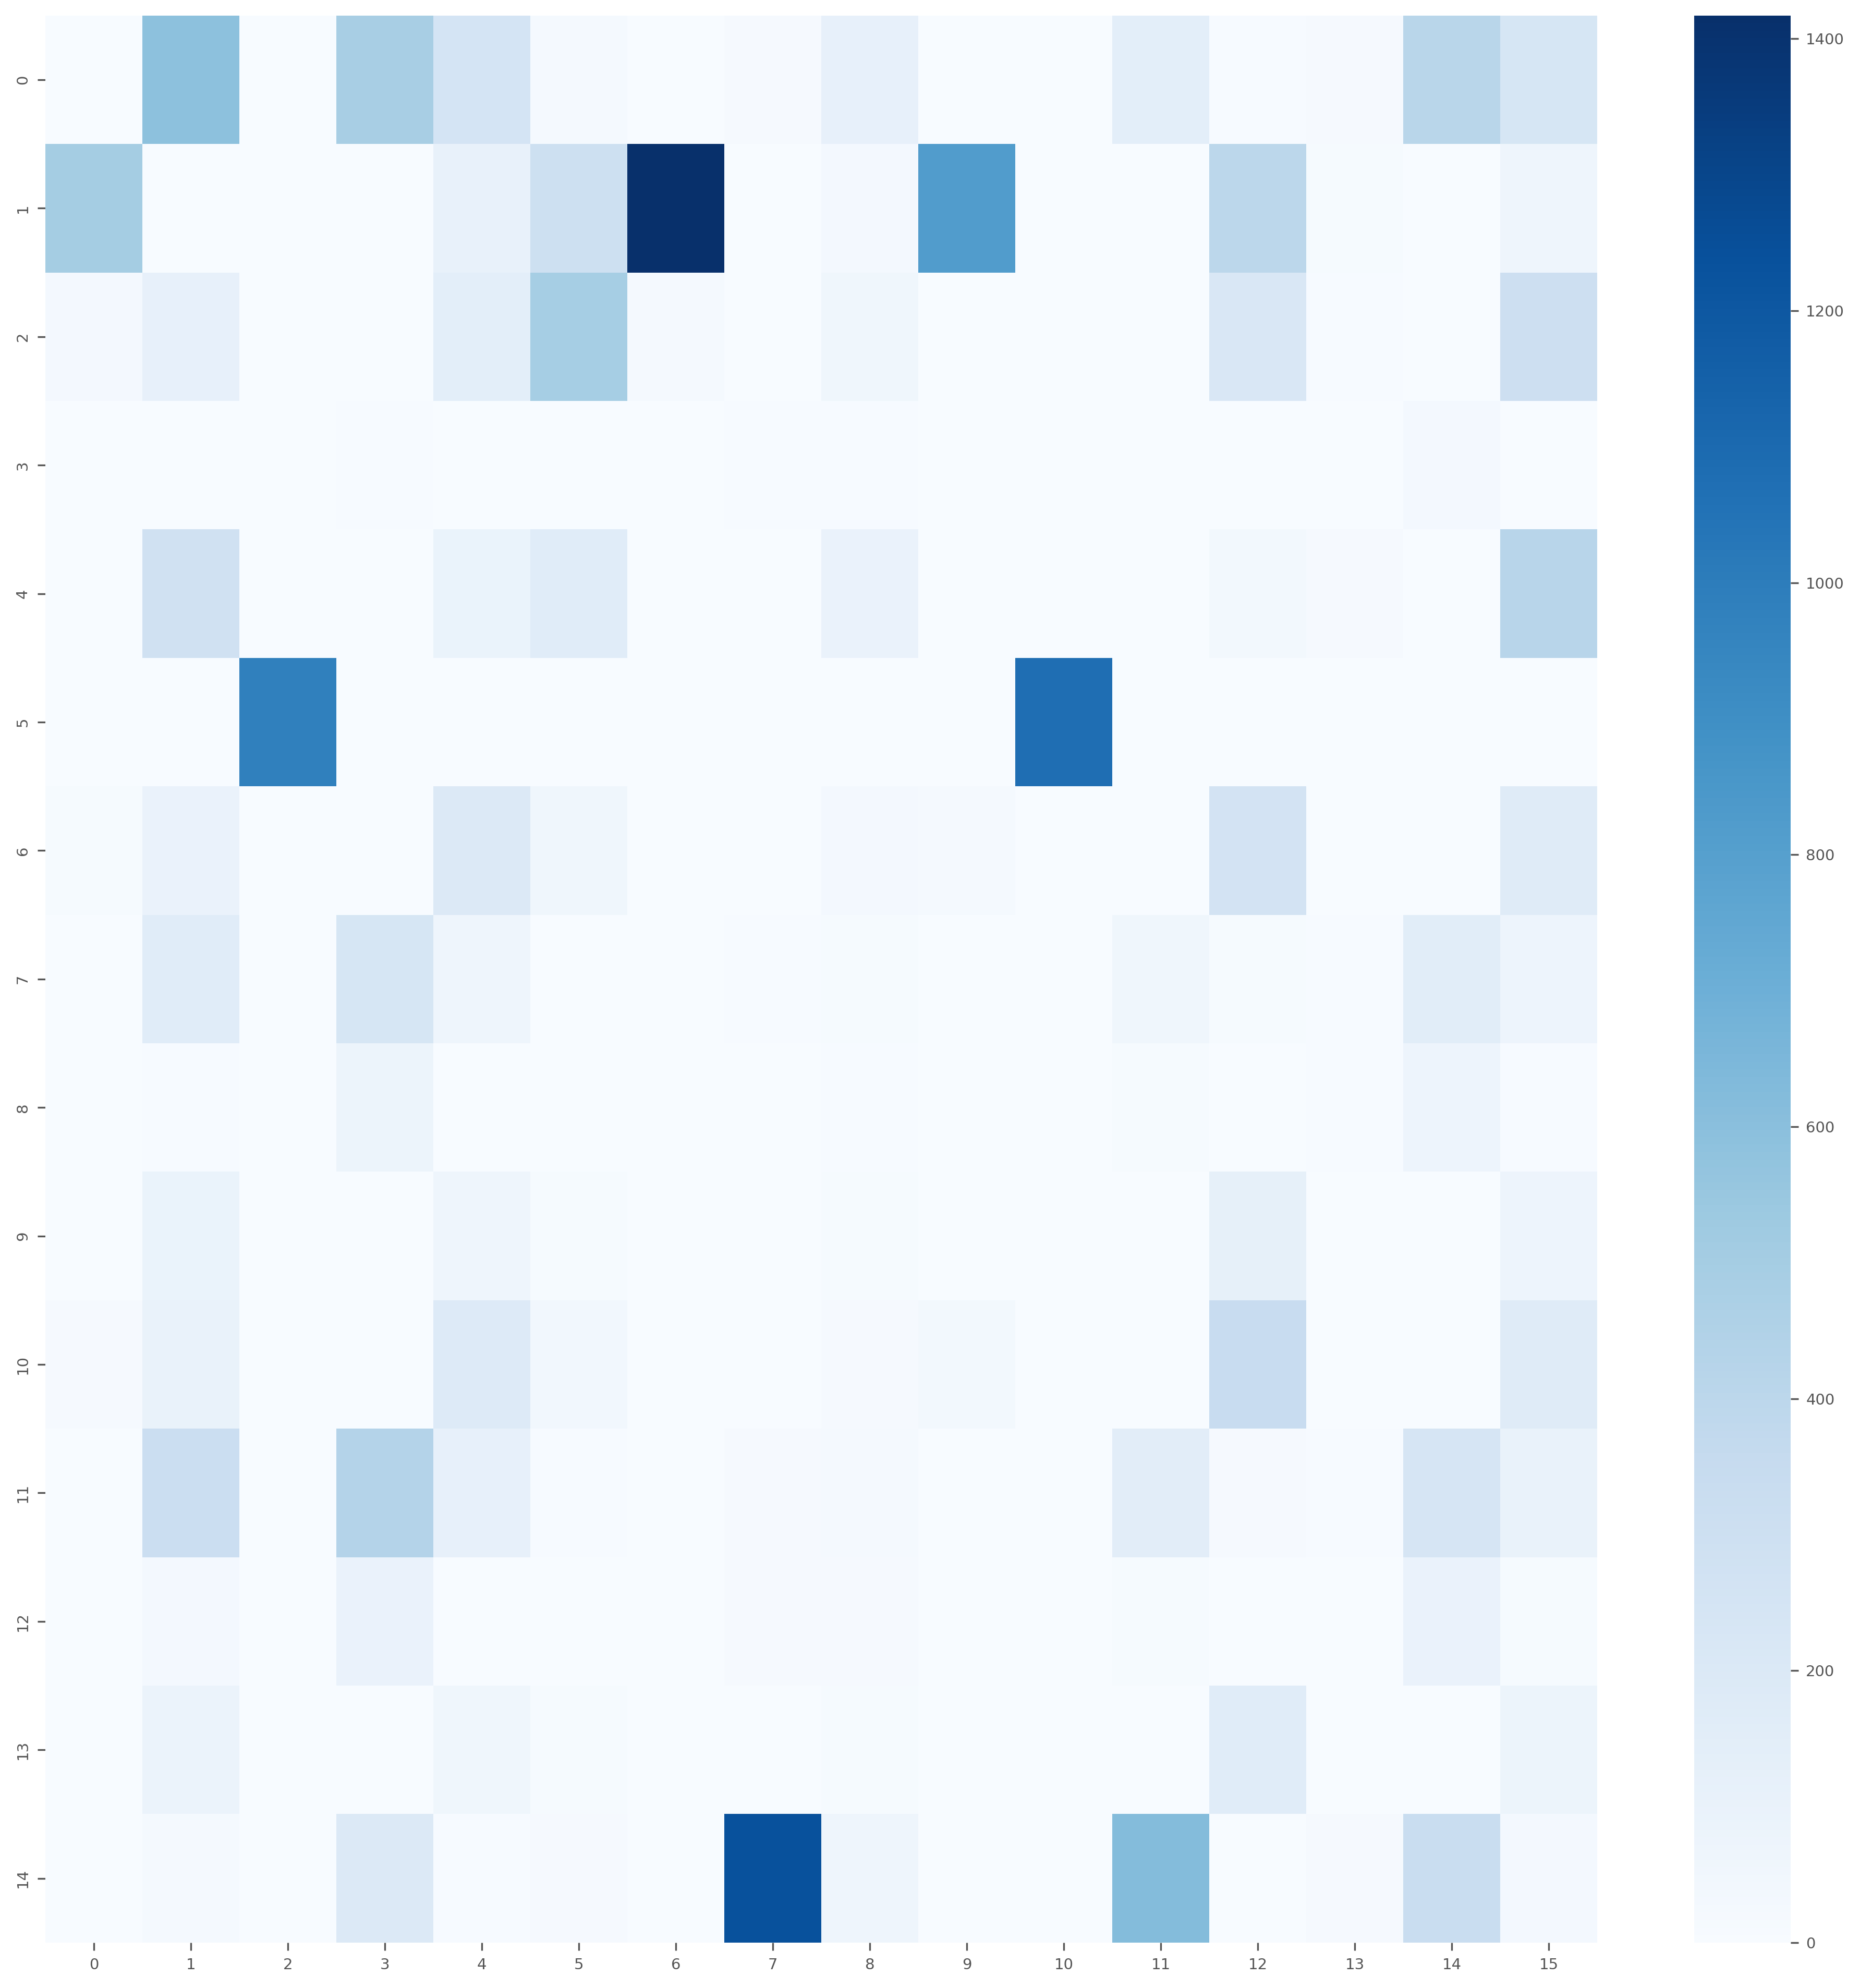

In [41]:
cf_matrix = contingency_matrix(labels_true=y_true, labels_pred=y_pred)
plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(16,16))
sns.heatmap(cf_matrix, fmt='', cmap='Blues')

In [42]:
cluster_purities = list((np.max(cf_matrix, axis=1)/np.sum(cf_matrix, axis=1)))
maximum = max(cluster_purities)
indices = [i for i, x in enumerate(cluster_purities) if x == maximum]
print(indices)
print(maximum)

[5]
0.5215914604560893


Cluster `5` had the highest purity ($\approx$ 0.52).

In [43]:
def purity_score(cf_matrix):
    return np.sum(np.max(cf_matrix, axis=1)) / np.sum(cf_matrix)

In [44]:
print(f'Clustering purity: {purity_score(cf_matrix)}')

Clustering purity: 0.3774205728464318


Overall clustering purity is low as expected, since most features were discarded.